# Costly Conversion Data Challenge

You sit inside the product team at Symantec, which sells a cyber security software for 39 dollars across a variety of devices. Revenue has been flat for some time, so the VP of Product would like to experiment with the effect of increasing the price. Your team designed an experiment to measure the effect of doing so. In the experiment, 66\% of the users have seen the old price (39), while a random sample of 33\% users were shown a higher price (59).


The experiment has been running for some time and the VP of Product is interested in understanding how it went. She would like to learn key insights about what drives conversion rate. She'd like a recommendation of what price to sell the software at, and for you to quantify the cost of the experiment and whether you could have done it in shorter time. Would you have designed the experiment differently, why or why not?


My hypothesis is that increasing the software price will lead to decreased conversion rates, because some customers who would have bought the product at a lower price will no longer purchase it. However, this effect is likely to depend on the type of customer. It's possible there are certain groups of people who will purchase the software at any price, and some that will buy it only at a low price. It would be useful to be able to identify those customers. 


Even if the conversion rate decreases, the profit might still increase if the price increase is enough to balance out the volume decrease in sales. Time to investigate!


## Outline

1. Data Cleaning
2. EDA and Insights
3. Cost of experiment and Experiment design
4. Conclusions

## 1. Data Cleaning

I'll start by importing the data and merging the tables together on user ID.

In [1]:
import pandas as pd

df_results = pd.read_csv('Data/test_results.csv')
df_users = pd.read_csv('Data/user_table.csv')

In [2]:
df_results.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0


In [3]:
df_users.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [4]:
df = df_results.merge(df_users)
df.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02


In [5]:
df.describe()

,Unnamed: 0,user_id,test,price,converted,lat,long
count,275616.000000,275616.000000,275616.000000,2.756160e+05,275616.000000,275616.000000,275616.000000
mean,158364.316324,499245.801521,0.359878,6.470932e+06,0.018210,37.111680,-93.981772
std,91439.226245,288533.458944,0.479965,6.809917e+07,0.133711,5.209627,18.086486
min,0.000000,3.000000,0.000000,3.900000e+01,0.000000,19.700000,-157.800000
25%,79129.750000,249544.500000,0.000000,3.900000e+01,0.000000,33.660000,-112.200000
50%,158399.500000,498861.000000,0.000000,3.900000e+01,0.000000,37.740000,-88.930000
75%,237567.250000,748856.500000,1.000000,5.900000e+01,0.000000,40.700000,-78.910000
max,316799.000000,999999.000000,1.000000,9.998843e+08,1.000000,61.180000,30.310000


It looks like the Unnamed: 0 column is just a repeat of the index, so I will drop that column. Then I'll explore the values in each of the columns to find out if there's any bad or missing data. For example, test and converted should only have zeros and ones.

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
print('Unique values in test column: ')
print(df.test.unique())
print('Unique values in converted column: ')
print(df.converted.unique())
print('Unique values in price column: ')
print(df.price.unique())
print('Unique values in source column: ')
print(df.source.unique())
print('Unique values in device column: ')
print(df.device.unique())
print('Unique values in OS column: ')
print(df.operative_system.unique())

Unique values in test column: 
[0 1]
Unique values in converted column: 
[0 1]
Unique values in price column: 
[3.90000000e+01 5.90000000e+01 7.60350245e+08 ... 8.08182142e+08
 6.55179349e+08 6.21407779e+08]
Unique values in source column: 
['ads_facebook' 'seo-google' 'ads-bing' 'direct_traffic' 'ads-google'
 'friend_referral' 'ads_other' 'ads-yahoo' 'seo-yahoo' 'seo_facebook'
 'seo-bing' 'seo-other' nan]
Unique values in device column: 
['mobile' 'web']
Unique values in OS column: 
['iOS' 'android' 'mac' 'windows' nan 'anroid' 'apple' 'wnddows' 'i0S']


The test and converted columns have the correct values only, but the price column has some bad data! What do those rows look like? If everything else looks ok, I can just impute the price based on the test case. 

In [8]:
df[df.price > 100]

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
84,713483,2015-05-01 22:14:32,direct_traffic,web,mac,0,760350245.0,0,Cleveland,USA,41.48,-81.68
177,34593,2015-03-30 08:14:44,ads_other,web,windows,0,630429505.0,0,Sacramento,USA,38.57,-121.47
238,878231,2015-03-20 01:08:07,ads-bing,mobile,iOS,0,991021920.0,0,Houston,USA,29.77,-95.39
256,951988,2015-05-02 13:20:25,ads_facebook,web,windows,0,532089148.0,0,Jacksonville,USA,30.33,-81.66
354,839013,2015-03-06 10:52:08,ads_facebook,mobile,iOS,1,586982279.0,1,Eldersburg,USA,39.41,-76.94
372,589975,2015-04-26 08:54:42,ads_facebook,mobile,iOS,0,838114695.0,0,Rancho Cucamonga,USA,34.12,-117.57
452,298770,2015-05-18 12:54:04,ads-bing,mobile,android,0,991024673.0,0,Winston-Salem,USA,36.10,-80.26
480,165419,2015-04-10 04:29:28,friend_referral,web,windows,0,731608106.0,0,Detroit,USA,42.38,-83.10
519,53480,2015-05-22 06:54:28,ads_facebook,web,windows,0,582513317.0,0,Kennewick,USA,46.20,-119.17
561,322747,2015-04-23 08:07:10,seo-yahoo,mobile,android,0,578296316.0,0,Overland Park,USA,38.91,-94.68


At first glance, these data look ok. What if I look for data using missingno?

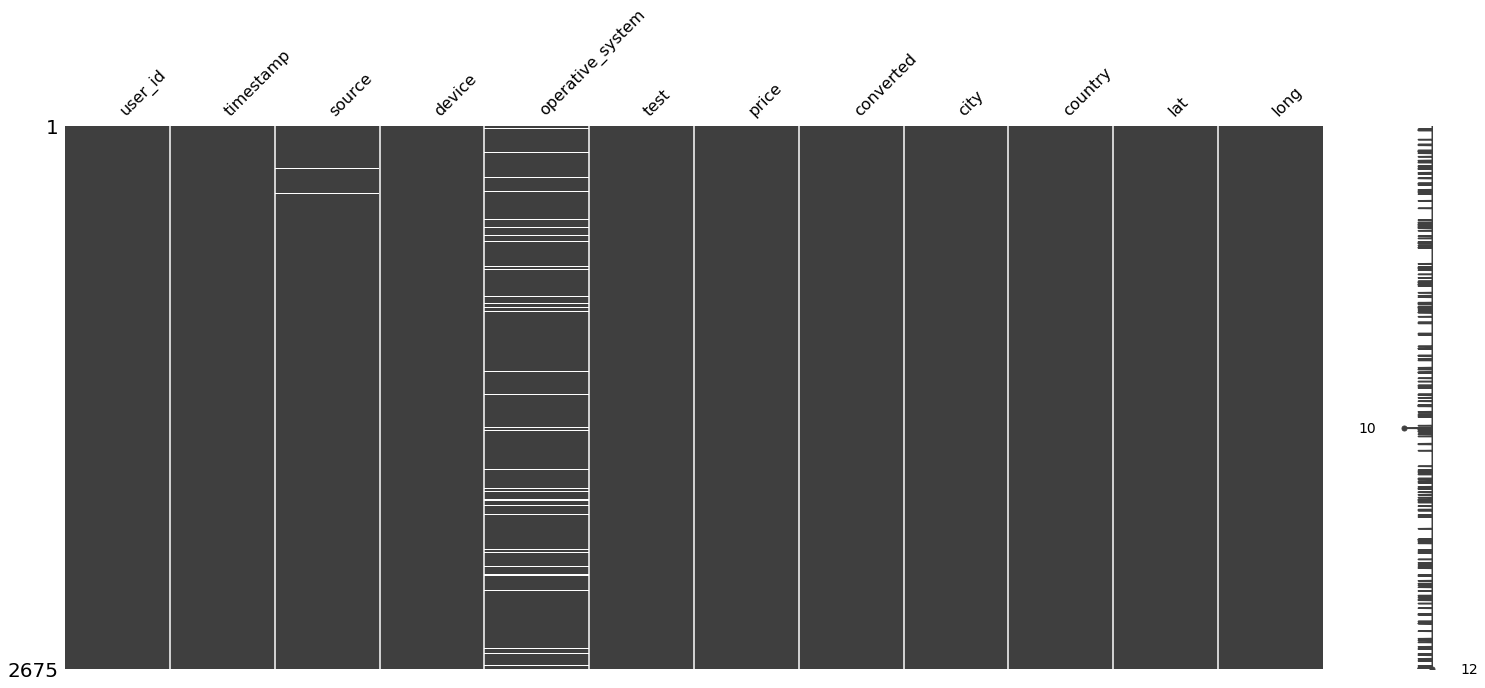

In [9]:
import missingno as msno
%matplotlib inline

msno.matrix(df[df.price > 100])

There are some missing source and OS data, but is that any worse than the rest of the dataset?

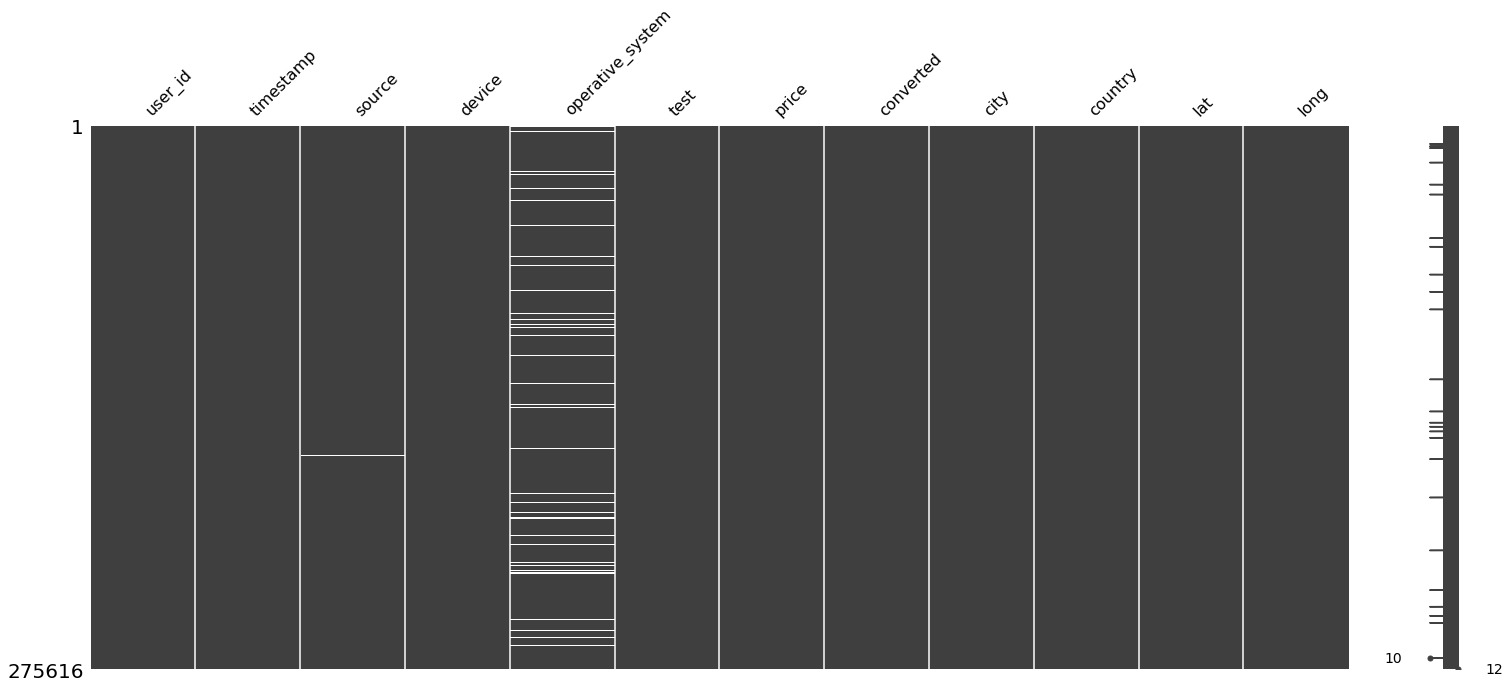

In [10]:
msno.matrix(df)

There's a similar amount of missing OS data in the subset and full dataset, so I feel comfortable imputing the weird price data based on the test.

In [11]:
df.loc[(df.price>100) & (df.test==0),'price'] = 39.0
df.loc[(df.price>100) & (df.test==1),'price'] = 59.0
print('Unique values in price column: ')
print(df.price.unique())

Unique values in price column: 
[39. 59.]


Less than 10% of the data have missing values, so I will drop those data for now

In [12]:
df.dropna(inplace=True)

The OS column has some repeated values/typos. For example, mac=apple, android=anroid, iOS=i0S, and windows=wnddows! I'll fix these next.

In [13]:
df.loc[df.operative_system=='i0S','operative_system'] = 'iOS'
df.loc[df.operative_system=='anroid','operative_system'] = 'android'
df.loc[df.operative_system=='apple','operative_system'] = 'mac'
df.loc[df.operative_system=='wnddows','operative_system'] = 'windows'


## 2. EDA and Insights

Now it's time to start exploring what features are important for driving conversion!

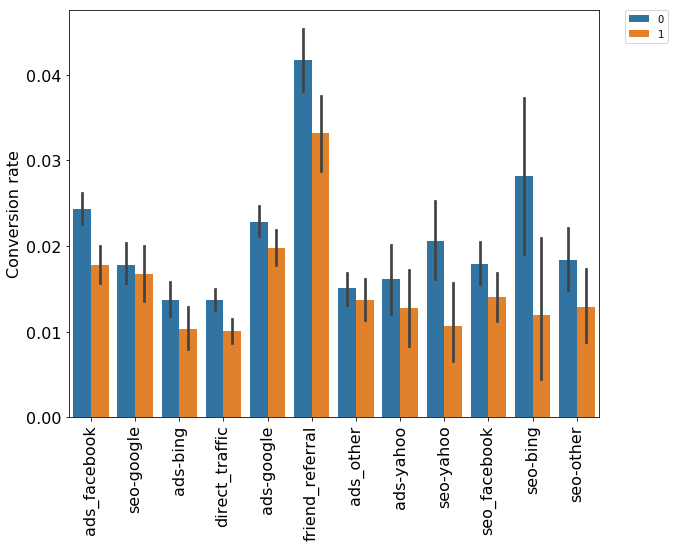

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(9.5,7.5))
sns.barplot(x='source', y='converted', hue='test', data=df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set_ylabel('Conversion rate')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)


A few things are immediately obvious. First of all, my hypothesis that the conversion rate would decrease when increasing the price was correct. 

Secondly, the conversion rate depends a lot on source. People who come to the website through a friend's referral link are much more likely to buy the product than people who click on an ad.

Thirdly, the effect of increasing the price seems to vary quite a bit by source! For example, for people who find the product through google searches, the conversion rate doesn't change very much. However, for people who find the product through yahoo or bing searches, the effect seems a lot higher! This is a pretty confusing result - is it possible there's just way fewer data from those search engines?



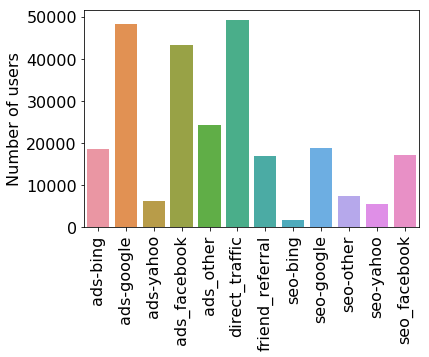

In [64]:
source_count = df.groupby(['source'])['converted'].count().reset_index()
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x='source', y='converted', data=source_count)
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set_ylabel('Number of users')
ax.set_xlabel('')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)


In fact, most of their user traffic comes from ads and direct traffic. Fewer users come from search engines, and it's true that there are a very small number of users coming from bing. That likely explains the weird discrepancy between the behavior of google and bing searchers!

Although friend referrals have the high convergence rate, they are a relatively small fraction of the total number of customers. In order to increase sales, we could focus on trying to increase the number of friend referrals that occur - perhaps through some incentives for the referrers?

I think it might be useful to group by source type - I will bin the sources based on ads, direct traffic, referrals, and seo because I expect user behavior to be similar within each of these categories.

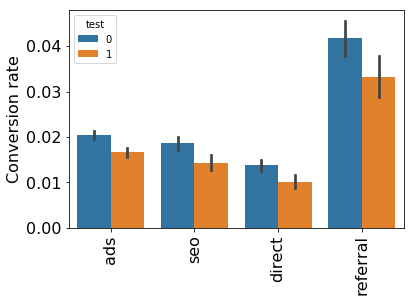

In [65]:
import numpy as np
df['source_group'] = np.nan
df.loc[df.source.str.contains('ads'),'source_group'] = 'ads'
df.loc[df.source.str.contains('direct'),'source_group'] = 'direct'
df.loc[df.source.str.contains('referral'),'source_group'] = 'referral'
df.loc[df.source.str.contains('seo'),'source_group'] = 'seo'

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x='source_group', y='converted', hue='test', data=df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set_ylabel('Conversion rate')
ax.set_xlabel('')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)


Referrals from friends have the highest conversion rate, likely because people trust their friends! This is followed by ads and seo users, which have about the same conversion rate. Interestingly, users who come to the site directly have the lowest conversion rate.

What about the effects of device and OS?

Text(0.5, 0, 'Device')

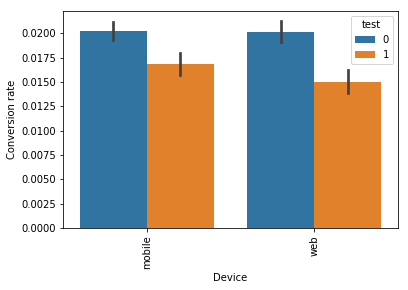

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x='device', y='converted', hue='test', data=df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set_ylabel('Conversion rate')
ax.set_xlabel('Device')

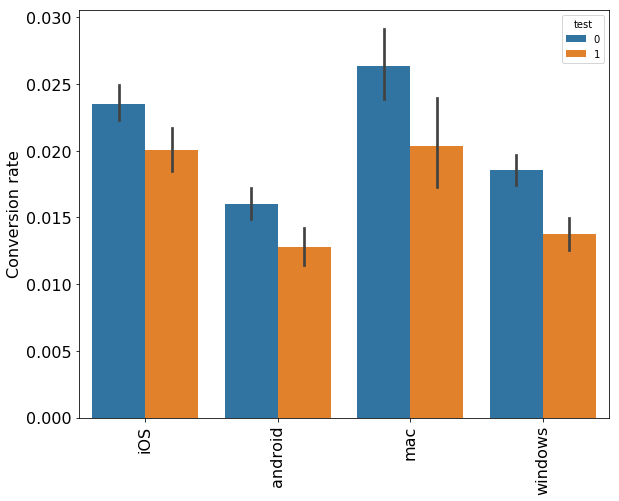

In [67]:
fig, ax = plt.subplots(figsize=(9.5,7.5))
sns.barplot(x='operative_system', y='converted', hue='test', data=df)
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set_ylabel('Conversion rate')
ax.set_xlabel('')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)


It seems like this security software is more popular amongst mac and iOS users than windows and android users.

Is there any time dependence to the conversions?

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


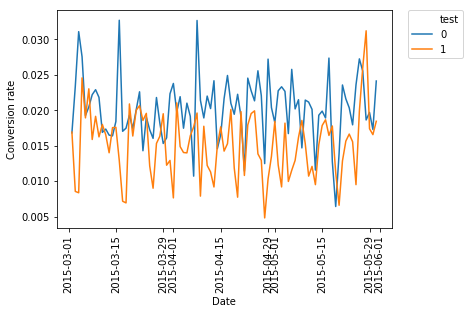

In [69]:
df['date'] = np.nan
df['date'] = df.timestamp.str.split(' ',expand=True)
df['date'] = pd.to_datetime(df['date'].str.replace('2815','2015'))
days_conversion_rate = df.groupby(['date','test'])['converted'].agg(
        {'mean' : np.mean, 'sum' : np.sum}).reset_index()

fig,ax = plt.subplots(figsize=(6,4))
sns.lineplot(x='date', y='mean', hue='test', data=days_conversion_rate)
plt.xticks(rotation=90)
ax.set_ylabel('Conversion rate')
ax.set_xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


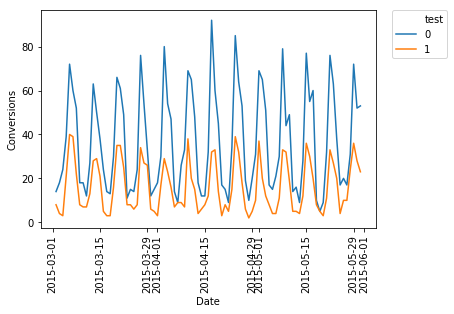

In [70]:
fig,ax = plt.subplots(figsize=(6,4))
sns.lineplot(x='date', y='sum', hue='test', data=days_conversion_rate)
plt.xticks(rotation=90)
ax.set_ylabel('Conversions')
ax.set_xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Text(0.5, 0, 'Date')

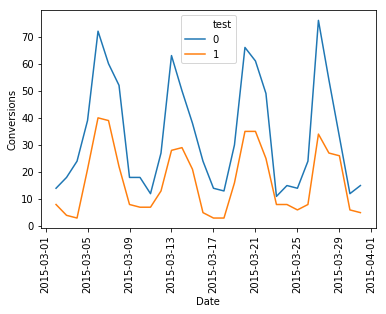

In [21]:
fig,ax = plt.subplots(figsize=(6,4))
sns.lineplot(x='date', y='sum', hue='test', data=days_conversion_rate[(days_conversion_rate.date<pd.to_datetime('2015-04-01'))])
plt.xticks(rotation=90)
ax.set_ylabel('Conversions')
ax.set_xlabel('Date')

Well, there's an interesting time dependence (weekly?) of the number of conversions, but the overal rates don't seem to change significantly over the course of the study. In addition, theres no clear cyclical variation in the conversion rates. It's hard for me to even tell from this what the weekly dependence it - I'm going to quickly investigate that.

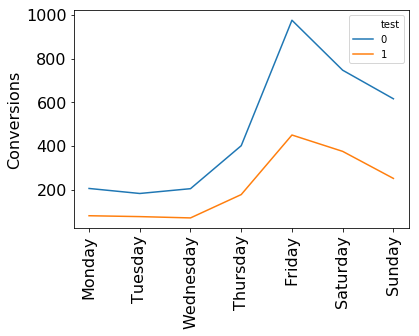

In [72]:
days_conversion_rate['weekday'] = days_conversion_rate.date.dt.weekday
weekday_conversion_rate = days_conversion_rate.groupby(['weekday','test'])['sum'].sum().reset_index() 
weekday_conversion_rate

fig,ax = plt.subplots(figsize=(6,4))
sns.lineplot(x='weekday', y='sum', hue='test', data=weekday_conversion_rate)
plt.xticks(rotation=90)
ax.set_ylabel('Conversions')
ax.set_xticklabels(['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_xlabel('')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)



It looks like the total number of conversions is lowest at the beginning of the week, peaks on Fridays, and then declines over the weekend. This is not what I would expect! Maybe if this is personal security software, rather than software for businesses, this shows that people tend to buy it over the weekend when they're not at work.

Maybe this shows that most ads could be targeted towards Friday, Saturday, Sunday, to minimize ad spending on the days when fewer users are likely to shop for their product.

In any case, the overall statistics of the conversion rate do not seem to vary significantly over the time period of the study.

## 3. Cost of experiment and Experiment design

In order to calculate the overall cost of the experiment, I need to calculate the total revenue during this time period and the total revenue I would have expected if the experiment were not going on. To do this I need to find the average conversion rate for each price.

In [25]:
conv_rate_39 = df.converted[df.test == 0].mean()
conv_rate_59 = df.converted[df.test == 1].mean()

print('Overall conversion rate at price of $39: ',conv_rate_39)
print('Overall conversion rate at price of $59: ',conv_rate_59)

print('The conversion rate decreased by :', round(100*(conv_rate_39-conv_rate_59)/conv_rate_39,2),'%')

Overall conversion rate at price of $39:  0.02019363091304796
Overall conversion rate at price of $59:  0.01601602685581244
The conversion rate decreased by : 20.69 %


In order to determine whether there is a statistically significant difference between the two conversion rates, I will perform Welch's t-test, which tests the null hypothesis that the two samples have equal mean and does not assume that the samples have the same variance. 

The p-value tells us the probability that these sample distributions could both be drawn from the same population. If it is >0.01, we will say that there is a significant difference between the sample populations.

In [26]:
import scipy

t,pval = scipy.stats.ttest_ind(df.converted[df.test==0], df.converted[df.test==1], axis=0, equal_var=False)
print('t test statistic: ',t)
print('p-value: ',pval)


t test statistic:  7.749469097514289
p-value:  9.268812189305839e-15


In fact, the p-value is about 9e-15, which provides strong evidence that the two samples are drawn from different populations and that the software price increase leads to a significant decrease in conversion rate.

So what about the total cost of the experiment? 

In [27]:
total_revenue_test = (df.converted[df.test == 0].sum()*39.0 + 
                      df.converted[df.test == 1].sum()*59.0)

total_revenue_39 = len(df)*conv_rate_39*39.0
total_revenue_59 = len(df)*conv_rate_59*59.0

print('')
print('Total revenue during the test: $', round(total_revenue_test,2))
print('Total revenue if the price had stayed at $39: $', round(total_revenue_39,2))
print('Extra revenue during the test: $', round(total_revenue_test-total_revenue_39,2))
print('Total revenue if the price was at $59: $', round(total_revenue_59,2))
print('Extra revenue if the price had been $59 the whole time: $', round(total_revenue_59-total_revenue_39,2))



Total revenue during the test: $ 217170.0
Total revenue if the price had stayed at $39: $ 202635.45
Extra revenue during the test: $ 14534.55
Total revenue if the price was at $59: $ 243132.61
Extra revenue if the price had been $59 the whole time: $ 40497.16


So this experiment actually made the company money - an extra 15,000 dollars -  even though the conversion rate decreased at the higher software price. If the price had been raised for all customers, we would have earned an extra 40,000 dollars! I would recommend that the software price be increased to 59 dollars.

Is it possible that this experiment could have been run for a shorter period of time and still  have been able to observe the expected increase in revenue? Let's calculate the p-value for just the first month's worth of data, to see if we could have still observed a statistically significant change. 

In [28]:
t_month,pval_month = scipy.stats.ttest_ind(df.converted[(df.test==0) & (df.date<pd.to_datetime('2015-04-01'))], 
                               df.converted[(df.test==1) & (df.date<pd.to_datetime('2015-04-01'))], 
                               axis=0, equal_var=False)
print('t test statistic for one month of data: ',t_month)
print('p-value for one month of data: ',pval_month)
print('')

t_week,pval_week = scipy.stats.ttest_ind(df.converted[(df.test==0) & (df.date<pd.to_datetime('2015-03-08'))], 
                               df.converted[(df.test==1) & (df.date<pd.to_datetime('2015-03-08'))], 
                               axis=0, equal_var=False)
print('t test statistic for one month of data: ',t_week)
print('p-value for one month of data: ',pval_week)

t test statistic for one month of data:  2.6302506780934225
p-value for one month of data:  0.008534201577183606

t test statistic for one month of data:  1.0575692484845163
p-value for one month of data:  0.29027152331621525


Yes! If this experiment had been run for only a month, we still would have observed a statistically significant change. Also, we have found that the time series of conversion rates are stationary over the period of test, so we don't have to worry observing changing statistics over longer periods of time. However, one week of data is not enough to observe this change at a statistically significant level. I would suggest running future experiments for one month's time.

How much money would we likely have made over the three month period if the experiment had ended after one month and then the price had been increased?

In [29]:
total_revenue_test2 = (df.converted[(df.test==0) & (df.date<pd.to_datetime('2015-04-01'))].sum()*39.0 + 
                      df.converted[(df.test == 1) & (df.date<pd.to_datetime('2015-04-01'))].sum()*59.0 +
                      len(df[df.date>=pd.to_datetime('2015-04-01')])*conv_rate_59*59.0)

print('Total revenue if the experiment ended after one month: $', round(total_revenue_test2,2))
print('Extra revenue if the experiment ended after one month: $', round(total_revenue_test2-total_revenue_39,2))


Total revenue if the experiment ended after one month: $ 234770.13
Extra revenue if the experiment ended after one month: $ 32134.67


If this experiment had ended after one month, we would have doubled our increased revenue over this three month time period!

One additional change to experimental design that I might make is to test more than one increased price at the same time. It's possible that we would be able to increase revenue further with an even more increased price, but there's no way to know without that data!

## 4. Conclusions


Key insights driving conversion:
- Overall conversion rate decreases by about 20% when increasing the price from 39 to 59 dollars.
- The majority of users coming to the website arrive through ad clicks or directly accessing the website.
- Users who were referred by friends have the highest conversion rate by far -- more than twice as high as users coming from ads, the next highest group! However, they represent a relatively small group of total users. If the goal is to increase revenue even further, it might be smart to try and increase the number of friend referrals, perhaps by incentivizing current customers to refer people they know.
- The conversion rate for mac and iOS users is higher than that for windows and android users, suggesting apple customers prefer this product. It would also be smart to target margeting towards users of apple products!
- Although the conversion rate doesn't vary regularly with time, there is a clear weekly cycle to the total number of conversions (due to a weekly cycle of the number of total users). People tend to buy the software most often on Fridays, followed by Saturday and Sunday. This suggests to me that this is a personal software rather than business, and ad spending could perhaps be targeted towards weekends, when most of our potential customers are more likely to be shopping for security software. 

Cost of experiment:
- Symantic made about 15,000 dollars above the revenue expected from the old price.
- Going forward, if the conversion rates remain the same, Symantic can expect to earn about 40,000 dollars (per three month period) more than they did before.

Experiment design:
- Statistically significant changes in conversion rate could have been observed with just one month's worth of data instead of three, so for future experiments with changes in price of this magnitude, I would recomment decreasing the test length.
- However, if testing smaller increases in price, I would recommend keeping the experiment at lengths of three months because it will take longer to observe a significant change in those cases.
- It could also be useful to test multiple price increases during one experiment, to assess the optimal value for the price. From this experiment, we have no idea whether an even higher price would lead to higher revenue.